In [30]:
from PIL import Image, ImageOps
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
im1 = Image.open("D:/Landscape.jpg")
im2 = Image.open("D:/Town.jpg")
im3 = Image.open("D:/House.jpg")
print(im1.size, im1.mode)
print(im2.size, im2.mode)
print(im3.size, im3.mode)

(1920, 1080) RGB
(1920, 1080) RGB
(2048, 1356) RGB


In [32]:
gray1 = ImageOps.grayscale(im1)
gray2 = ImageOps.grayscale(im2)
gray3 = ImageOps.grayscale(im3)

In [33]:
hist1 = np.array(gray1.getdata())
hist2 = np.array(gray2.getdata())
hist3 = np.array(gray3.getdata())

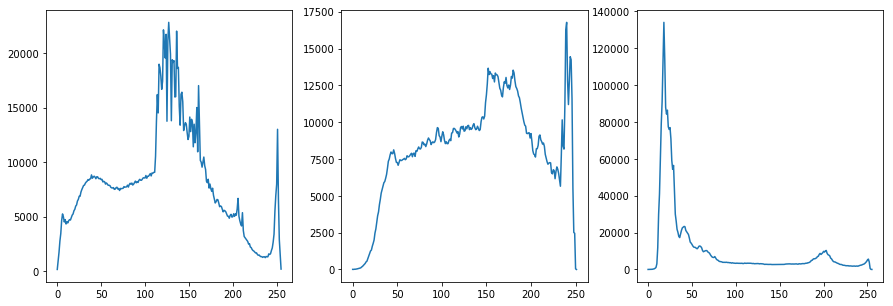

In [34]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.plot(np.bincount(hist1))
ax2.plot(np.bincount(hist2))
ax3.plot(np.bincount(hist3))

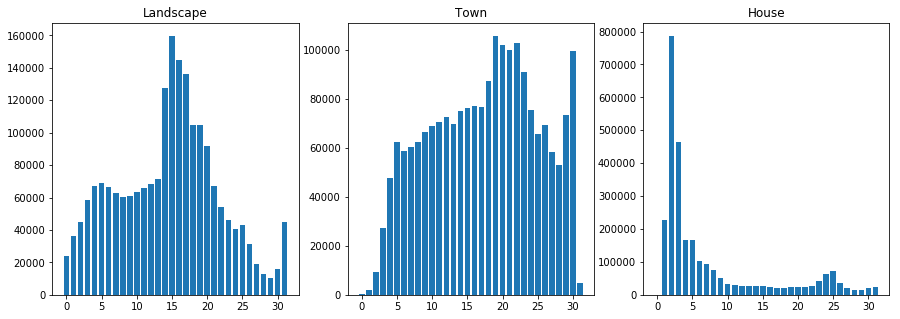

In [35]:
ihist1 = hist1//8
ihist2 = hist2//8
ihist3 = hist3//8
len_hist=[i for i in range(32)]
g, (ay1, ay2, ay3) = plt.subplots(1, 3, figsize=(15,5))
ay1.bar(len_hist, np.bincount(ihist1))
ay1.title.set_text('Landscape')
ay2.bar(len_hist, np.bincount(ihist2))
ay2.title.set_text('Town')
ay3.bar(len_hist, np.bincount(ihist3))
ay3.title.set_text('House')

In [36]:
#среднее, среднеквадратическое, моду и медиану
mean1 = ihist1.mean()
std1 = ihist1.std()
mod1 = np.argmax(np.bincount(ihist1))
med1 = np.median(ihist1)
print("Image 1: mean {}, std {}, moda {}, median {}".format(mean1, std1, mod1, med1))
mean2 = ihist2.mean()
std2 = ihist2.std()
mod2 = np.argmax(np.bincount(ihist2))
med2 = np.median(ihist2)
print("Image 2: mean {}, std {}, moda {}, median {}".format(mean2, std2, mod2, med2))
mean3 = ihist3.mean()
std3 = ihist3.std()
mod3 = np.argmax(np.bincount(ihist3))
med3 = np.median(ihist3)
print("Image 3: mean {}, std {}, moda {}, median {}".format(mean3, std3, mod3, med3))

Image 1: mean 14.45516010802469, std 7.216997802779366, moda 15, median 15.0
Image 2: mean 17.425986207561728, std 7.610718408272006, moda 19, median 18.0
Image 3: mean 7.288291908646755, std 8.050565095068707, moda 2, median 3.0


In [37]:
print("Corelation histograms: " + str(np.corrcoef(np.bincount(ihist1), np.bincount(ihist2))[0,1]))
print("Corelation images: " + str(np.corrcoef(hist1, hist2)[0,1]))

Corelation histograms: 0.3422075023150338
Corelation images: 0.29231334219226196


In [38]:
alpha = 0.05
k1, p1 = stats.normaltest(np.bincount(ihist1))
k2, p2 = stats.normaltest(np.bincount(ihist2))
k3, p3 = stats.normaltest(np.bincount(ihist3))

print(p1)
print(p2)
print(p3)

if p1 > alpha:  # null hypothesis: hist comes from a normal distribution
    print("Image 1: the H0 hypothesis is rejected")
else:
    print("Image 1: the H0 hypothesis can be accepted")
    
if p2 > alpha:  # null hypothesis: hist comes from a normal distribution
    print("Image 2: the H0 hypothesis is rejected")
else:
    print("Image 2: the H0 hypothesis can be accepted")
    
if p3 > alpha:  # null hypothesis: hist comes from a normal distribution
    print("Image 3: the H 0 hypothesis is rejected")
else:
    print("Image 3: the H0 hypothesis can be accepted")

0.07725264385584123
0.058822409912859926
1.078802654553968e-11
Image 1: the H0 hypothesis is rejected
Image 2: the H0 hypothesis is rejected
Image 3: the H0 hypothesis can be accepted


In [ ]:
`